# Generation of unconditional facies models using DCGAN
<p> <b \>
<p>This is the code for the paper "U-Net GAN for subsurface facies modeling".<b \>
<p>In this paper, we trained a DCGAN based on a dataset consisting of 10,000 facies models.
<p>Here is the script to generate unconditional facies models with the trained Generator.

In [ ]:
# import python modules.

import torch
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# import the generator and load trained parameters.

from unconditional_DCGAN_model import Generator80x100

G = Generator80x100()
G.load_state_dict(torch.load('./GAN_generator_in_epoch70.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
# define a function to process the output image as we illustrated in the paper.

def image(z):
    img = G(z).view(-1, 80, 100).detach().numpy()
    img = (img + 1)/2
    img = np.where(img<0.5, 0, 1)
    return img

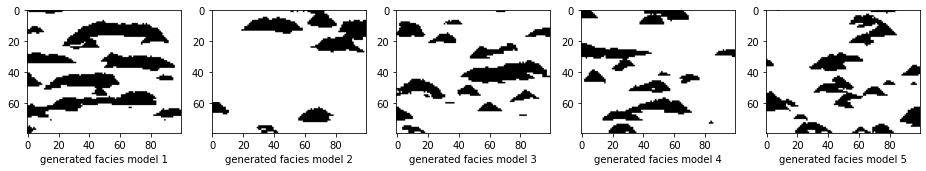

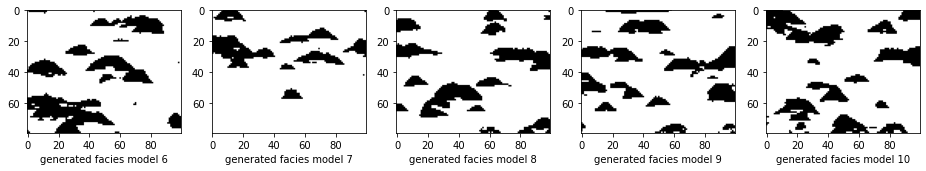

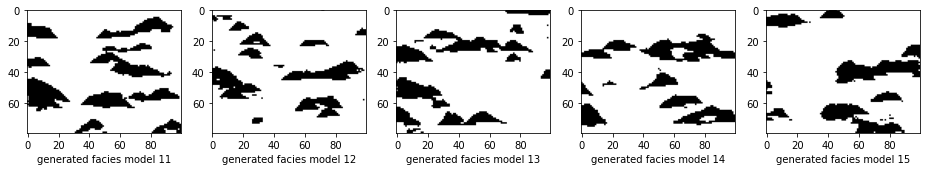

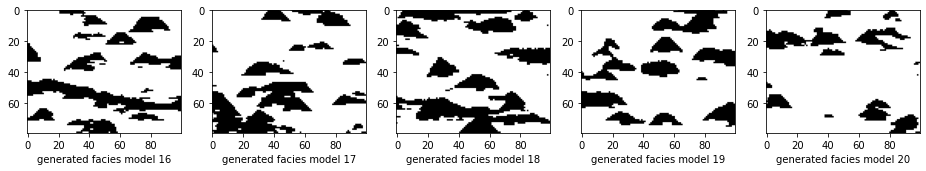

In [5]:
# generate random images

z = torch.randn(20, 100)
imgs = image(z).reshape(-1, 80, 100)
for i in range(4):
    fig=plt.figure(figsize=(16, 20))
    for j in range(5):
        index = 5*i+j
        fig.add_subplot(1, 5, j+1)
        plt.imshow(imgs[index].reshape(80, 100), cmap='gray')
        plt.xlabel('generated facies model {}'.format(index + 1))
    plt.show()

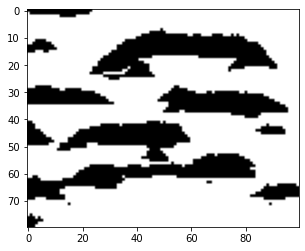

In [7]:
# if you like you can save some images

plt.imshow(imgs[0], cmap='gray')
plt.imsave('./unconditional facies models.png', imgs[0], cmap='gray')